## Machine Learning - Ex.8


Submitted by: Raz Gvili

In [77]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


## PCA


Implement the PCA algorithm as presented in class.

**Input:**


1) a matrix `X` of size $n\times d$ (representing $n$ samples in $d$-dimensions) 

2) a parameter `k` $(k\leq d)$` (the output dimension).

**Output:**


1) a matrix ```Z``` of size $n\times k$ (the reduced representation of the data)

2) a matrix ```U``` of size $d\times k$ (with the $k$ eigenvectors as its coloumns)

3) a vector ```evls``` of size $k$ (with the corresponding $k$ eigenvalues)


hint: use `numpy.linalg.eig` function 



In [30]:
# PreProcessing

# Reduce mean
def RedMean(X_to_reduced):        
    X_reduced = X_to_reduced
    X_reduced -= X_to_reduced.mean(axis=0)
    return X_reduced

In [107]:
# PCA implementation
def PCA(X, k, returnAllEigenVecs=0, returnAllEigenVals=0):

    m, n = X.shape
    X = RedMean(X)
    
    # calculate C, the covariance matrix
    R = np.cov(X, rowvar=False)
    
    # calculate eigenvectors & eigenvalues of the covariance matrix    
    evls, U = np.linalg.eig(R)
    
    # sort in decreasing order
    idx = np.argsort(evls)[::-1]
    U = U[:,idx]
    
    # sort eigenvectors according to same index
    evls = evls[idx]
    
    if returnAllEigenVecs == 0:
        # select the first k eigenvectors
        U = U[:, :k]
    
    if returnAllEigenVals ==0:
        # select the first k eigenvalues
        evls = evls[0:k]
        
    Z = np.dot(U.T, data.T).T\
    
    return Z, U, evls



###  20-D data

Lets load the 20-D dataset:





data.shape =  (180, 20)


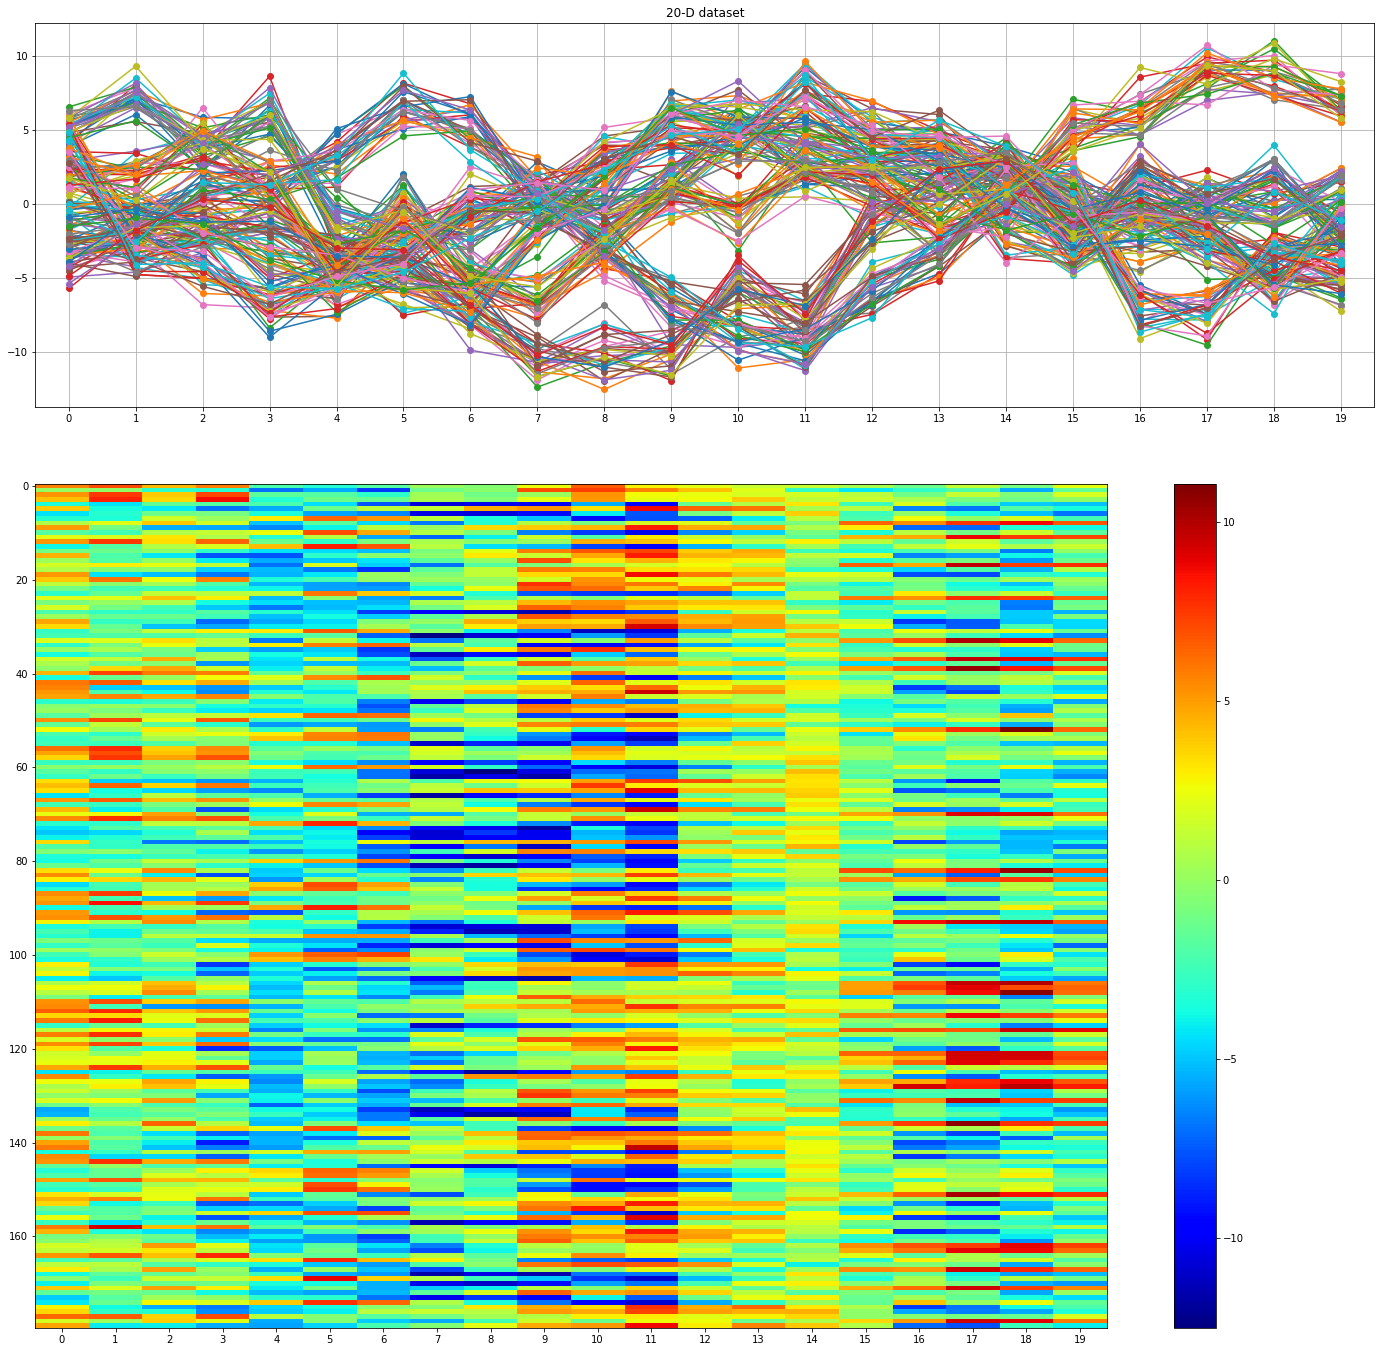

In [54]:
data = np.loadtxt('ex8_data.csv', delimiter=',')

print('data.shape = ',data.shape)
n,d = data.shape

plt.figure(figsize=(24,24))
plt.subplot(3,1,1)
plt.plot(data.T,'o-')
plt.title('20-D dataset')
plt.xticks(np.arange(20))
plt.xlim([-0.5,19.5])
plt.grid()

plt.subplot(3,1,(2,3))
plt.imshow(data,cmap=plt.cm.jet)
plt.xticks(np.arange(20))
plt.axis('normal')
plt.colorbar()
plt.show()

Use PCA to project the 20-D data into a 2-D subspace.
- **Does the projection capture the underlying structure of the data?**

- Next, try projecting it to 3-D as well. 

For 3D visualization see:


 https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html



- Calculate and plot all the **20 eigenvalues** $\lambda_j$ of the PCA

- How much of the variability the projection to 2-D captures? 
    -We can clearly see clustering in the data. 
    
- How much of the variability the projection to 3-D captures? 
    -We can clearly see clustering in the data. 
    

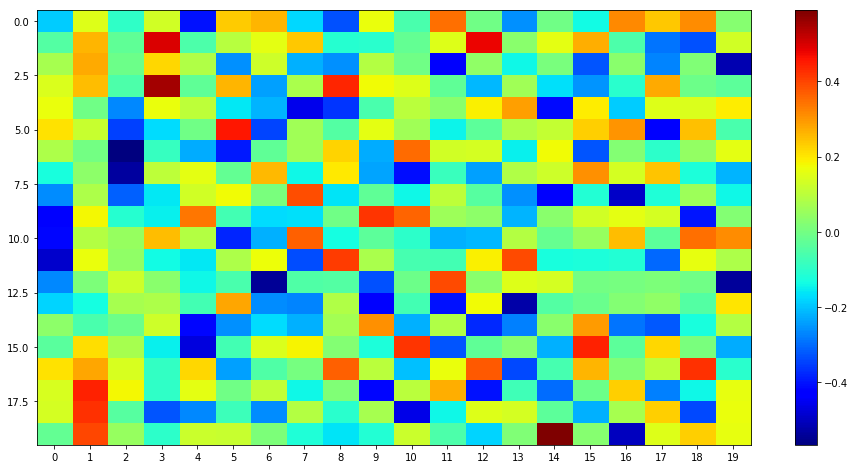

In [115]:
# plot all the 20 eigenvalues

Z2, U2_all_eagen, evls2 = PCA(data, 2, 1)
Z3, U3_all_eagen, evls3 = PCA(data, 3, 1)

plt.figure(figsize=(16,8))

plt.imshow(U2_all_eagen,cmap=plt.cm.jet)
plt.xticks(np.arange(20))
plt.axis('normal')
plt.colorbar()
plt.show()

Text(0.5,1,'20D ---> 2D')

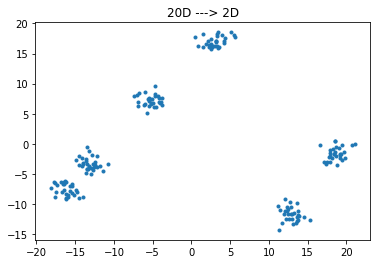

In [116]:
plt.plot(Z2[:,0],Z2[:,1],'.')
plt.title("20D ---> 2D")


Text(0.5,1,'eagenValues convergance')

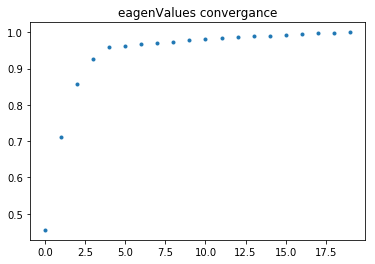

In [98]:
plt.plot(evls2.cumsum()/evls2.sum(),'.')
plt.title("eagenValues convergance")


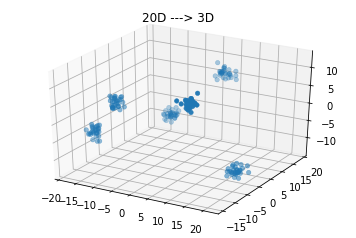

In [89]:
Z3, U3, evls3 = PCA(data, 3)

ax = plt.axes(projection='3d')
ax.set_title('20D ---> 3D')
ax.scatter(Z3[:,0], Z3[:,1], Z3[:,2], cmap='viridis', linewidth=0.5)


Use your `k-means` code from Ex.7 to cluster the dataset (`k= -6- See bar graph below `)

Sort and color the dataset accordingly (one color for each cluster) and visulaize the results.

In [118]:
# Prefer working with SKlearn, my algo not supporting dim>2
from sklearn.cluster import KMeans

# Select best k 
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    # Run k-means 100 times with different centroid seeds. return best result -> smallest error. 
    km = KMeans(n_clusters=k, n_init=100).fit(data)
    Sum_of_squared_distances.append(km.inertia_)

best_k = Sum_of_squared_distances.index(min(Sum_of_squared_distances)) + 1


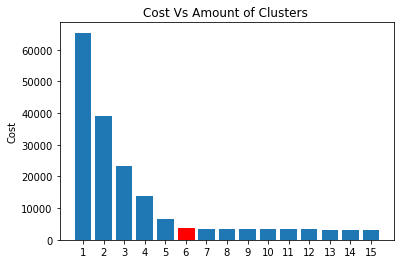

In [121]:
x = np.arange(15)

barlist=plt.bar(x, Sum_of_squared_distances)
barlist[5].set_color('r')
plt.xticks(x, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13','14','15'))
plt.ylabel('Cost')
plt.title('Cost Vs Amount of Clusters ')
plt.show()
    

In [122]:
best_km = KMeans(n_clusters=6, n_init=100).fit(data)

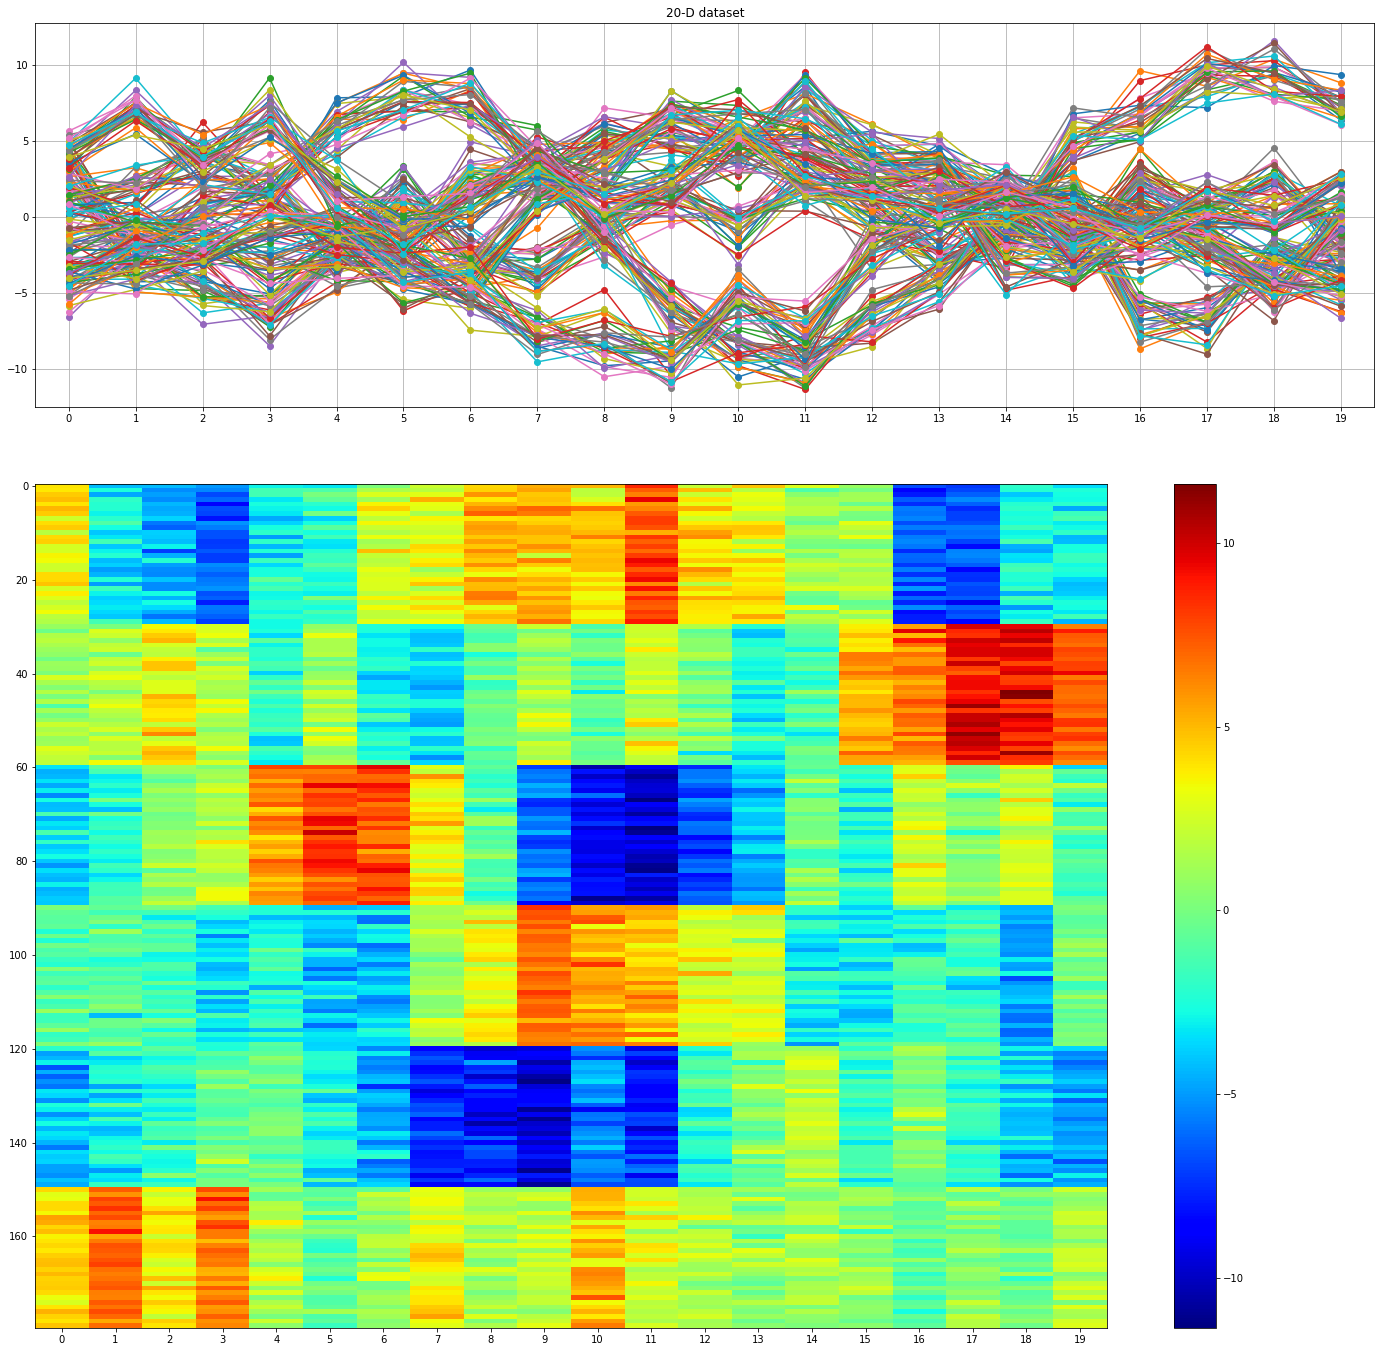

In [147]:
idx_data = np.argsort(best_km.labels_)[::-1]

plt.figure(figsize=(24,24))
plt.subplot(3,1,1)
plt.plot(data[idx_data].T,'o-')
plt.title('20-D dataset')
plt.xticks(np.arange(20))
plt.xlim([-0.5,19.5])
plt.grid()

plt.subplot(3,1,(2,3))
plt.imshow(data[idx_data],cmap=plt.cm.jet)
plt.xticks(np.arange(20))
plt.axis('normal')
plt.colorbar()
plt.show()

## Good luck !